In [1]:
import glob

fresh_apples = glob.glob('freshapples/*.*')

In [2]:
from PIL import Image
import numpy as np
from pylab import *

In [3]:
len(fresh_apples)

1693

In [4]:
fresh_apples

['freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 4.59.57 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.00.03 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.00.12 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.00.18 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.00.26 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.00.50 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.01.08 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.01.15 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.01.22 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.01.29 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.01.34 PM.png',
 'freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.01.41 P

In [5]:
im_list_fresh = [np.array((Image.open(i).resize((200,200))).convert('L')) for i in fresh_apples]

In [6]:
im_list_fresh_100 = [np.array((Image.open(i).resize((100,100))).convert('L')) for i in fresh_apples]

In [7]:
im_list_fresh[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
rotten_apples = glob.glob('rottenapples/*.*')

In [9]:
len(rotten_apples)

2342

In [10]:
im_list_rotten = [np.array((Image.open(i).resize((200,200))).convert('L')) for i in rotten_apples]

In [11]:
im_list_rotten_100 = [np.array((Image.open(i).resize((100,100))).convert('L')) for i in rotten_apples]

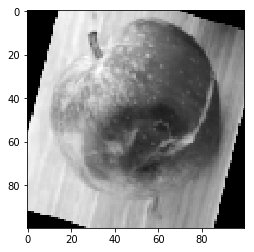

In [12]:
imshow(im_list_rotten_100[1120],'gray')

In [13]:
im_fruits = im_list_fresh+im_list_rotten

In [14]:
im_fruits_100 = im_list_fresh_100+im_list_rotten_100

In [15]:
len(im_fruits_100)

4035

In [16]:
y_fresh = [1 for i in range(len(im_list_fresh))]

In [17]:
y_fresh_100 = [1 for i in range(len(im_list_fresh_100))]

In [18]:
y_rotten = [0 for i in range(len(im_list_rotten))]

In [19]:
y_rotten_100 = [0 for i in range(len(im_list_rotten_100))]

In [20]:
y = y_fresh+y_rotten

In [21]:
y_100 = y_fresh_100+y_rotten_100

In [22]:
len(y_100)

4035

In [23]:
import random
temp = list(zip(im_fruits, y)) 
random.shuffle(temp) 
im_fruits, y = zip(*temp) 
        

In [24]:
import random
temp = list(zip(im_fruits_100, y_100)) 
random.shuffle(temp) 
im_fruits_100, y_100 = zip(*temp) 

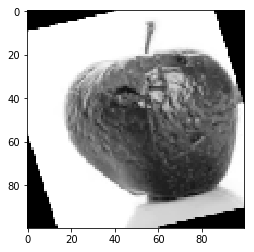

In [25]:
imshow(im_fruits_100[1],'gray')

In [26]:
y_100[1]

0

In [27]:
y[0:10]

(1, 1, 1, 1, 0, 0, 1, 0, 1, 1)

In [28]:
im_fruits = np.array(im_fruits)

In [29]:
im_fruits_100 = np.array(im_fruits_100)

In [30]:
im_fruits_100.shape

(4035, 100, 100)

In [31]:
type(im_fruits_100)

numpy.ndarray

In [32]:
temp = [i.flatten() for i in im_fruits_100]

In [33]:
temp = np.array(temp)

In [34]:
temp.shape

(4035, 10000)

In [35]:
X_train,y_train,X_test,y_test = temp[:],y_100[:],temp[400:500],y_100[400:500]

In [36]:
X_test[:10]

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 238, 240, 242],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

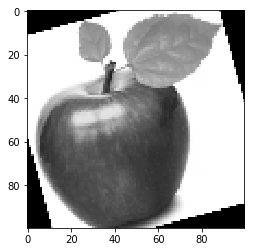

In [37]:
imshow(X_train[3].reshape(100,100),'gray')

In [38]:
y_train = [i==1 for i in y_train]

In [39]:
y_train = np.array(y_train)

In [40]:
type(X_train)

numpy.ndarray

In [41]:
y_train.shape

(4035,)

In [34]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train/255.0, y_train)

D:\anconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train/255.0, y_train, cv=3, scoring="accuracy")

D:\anconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_it

array([0.52451709, 0.67806691, 0.70535714])

In [36]:
sgd_clf.predict(X_train[1:10]/255.0)

array([False, False, False, False, False, False, False, False, False])

In [42]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from keras.optimizers import Adam

Using TensorFlow backend.


In [45]:
 model = keras.models.Sequential()

In [46]:
model.add(keras.layers.Flatten(input_shape=[200,200]))

In [47]:
model.add(keras.layers.Dense(6000,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

In [48]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",
              metrics=["accuracy"])

In [49]:
history = model.fit(im_fruits[:3000]/255.0, y_train[:3000], 
                    epochs=35,validation_data=(im_fruits[3000:]/255.0,y_train[3000:]))

Train on 3000 samples, validate on 1035 samples
Epoch 1/35
3000/3000 [==============================] - 51s 17ms/sample - loss: 0.7075 - acc: 0.5620 - val_loss: 0.6930 - val_acc: 0.4425
Epoch 2/35
3000/3000 [==============================] - 47s 16ms/sample - loss: 0.6827 - acc: 0.5747 - val_loss: 0.6900 - val_acc: 0.6184
Epoch 3/35
3000/3000 [==============================] - 48s 16ms/sample - loss: 0.6723 - acc: 0.5843 - val_loss: 0.6879 - val_acc: 0.5671
Epoch 4/35
3000/3000 [==============================] - 53s 18ms/sample - loss: 0.6546 - acc: 0.6100 - val_loss: 0.6243 - val_acc: 0.6415
Epoch 5/35
3000/3000 [==============================] - 51s 17ms/sample - loss: 0.6359 - acc: 0.6313 - val_loss: 0.6012 - val_acc: 0.6522
Epoch 6/35
3000/3000 [==============================] - 50s 17ms/sample - loss: 0.6250 - acc: 0.6420 - val_loss: 0.6210 - val_acc: 0.6667
Epoch 7/35
3000/3000 [==============================] - 49s 16ms/sample - loss: 0.6096 - acc: 0.6600 - val_loss: 0.5958 - va

In [50]:
model.save("4000_35_keras.h5")

In [36]:
 model = keras.models.Sequential()

In [37]:
model.add(keras.layers.Flatten(input_shape=[200,200]))

In [38]:
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",
              metrics=["accuracy"])

In [40]:
history = model.fit(im_fruits[:3000]/255.0, y_train[:3000], 
                    epochs=35,validation_data=(im_fruits[3000:]/255.0,y_train[3000:]))

Train on 3000 samples, validate on 1035 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/35
3000/3000 [==============================] - 20s 7ms/sample - loss: 0.6704 - acc: 0.5940 - val_loss: 0.6242 - val_acc: 0.6300
Epoch 2/35
3000/3000 [==============================] - 18s 6ms/sample - loss: 0.6426 - acc: 0.6200 - val_loss: 0.6051 - val_acc: 0.6473
Epoch 3/35
3000/3000 [==============================] - 19s 6ms/sample - loss: 0.6295 - acc: 0.6323 - val_loss: 0.5883 - val_acc: 0.6812
Epoch 4/35
3000/3000 [==============================] - 18s 6ms/sample - loss: 0.6045 - acc: 0.6567 - val_loss: 0.6098 - val_acc: 0.6638
Epoch 5/35
3000/3000 [==============================] - 19s 6ms/sample - loss: 0.6018 - acc: 0.6667 - val_loss: 0.6176 - val_acc: 0.6338
Epoch 6/35
3000/3000 [==============================] - 19s 6ms/sample - loss: 0.5772 - acc: 0.6817 - val_loss: 0.6438 - val_acc: 0.5903
Epoch 7/35
3000/3000 [==============

In [42]:
model.save("4x1000_35_keras.h5")

In [1]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[200,200]))

model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=["accuracy"])

history = model.fit(im_fruits[:3000]/255.0, y_train[:3000], 
                    epochs=35,validation_data=(im_fruits[3000:]/255.0,y_train[3000:]))

NameError: name 'keras' is not defined

In [50]:
def hist_norm(image,bins = 256):
    im_hist,bins = histogram(image.flatten(),bins,normed = True)
    cdf = im_hist.cumsum()
    cdf = 255*cdf/cdf[-1]
    im_array_gray_norm = interp(image.flatten(),bins[:-1],cdf)
    return im_array_gray_norm.reshape(image.shape)

In [51]:
im_fruits_hist_normed = [hist_norm(i) for i in im_fruits] 

D:\anconda\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


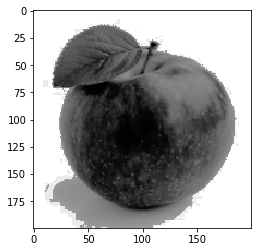

In [61]:
imshow(im_fruits_hist_normed[3],'gray')

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[100,100]))

model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=["accuracy"])

history = model.fit(im_fruits_100[:3000]/255.0, y_train[:3000], 
                    epochs=35,validation_data=(im_fruits_100[3000:]/255.0,y_train[3000:]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 3000 samples, validate on 1035 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/35
3000/3000 [==============================] - 10s 3ms/sample - loss: 0.6619 - acc: 0.5943 - val_loss: 0.6631 - val_acc: 0.6213
Epoch 2/35
3000/3000 [==============================] - 11s 4ms/sample - loss: 0.6215 - acc: 0.6480 - val_loss: 0.6233 - val_acc: 0.6734
Epoch 3/35
3000/3000 [==============================] - 11s 4ms/sample - loss: 0.6144 - acc: 0.6630 - val_loss: 0.5915 - val_acc: 0.6676
Epoch 4/35
3000/3000 [==============================] - 11s 4ms/sample - loss: 0.5923 - acc: 0.6727 - val_loss: 0.5718 - val_acc: 0.6928
Epoch 5/35
3000/3000 [==============================] - 11s 4ms/sample - loss: 0.5835 - acc: 0.6843 - val_loss: 0.6040 - val_acc: 0.6918
Epoch 6/35
3000/3000 [==============================] -

In [50]:
model.save("3x2000_100x100_keras.h5")

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[100,100]))

model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=["accuracy"])

history = model.fit(im_fruits_100[:3000]/255.0, y_train[:3000], 
                    epochs=55,validation_data=(im_fruits_100[3000:]/255.0,y_train[3000:]))

Train on 3000 samples, validate on 1035 samples
Epoch 1/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.6619 - acc: 0.5997 - val_loss: 0.6167 - val_acc: 0.6628
Epoch 2/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.6346 - acc: 0.6377 - val_loss: 0.5932 - val_acc: 0.6599
Epoch 3/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.6149 - acc: 0.6490 - val_loss: 0.6318 - val_acc: 0.6300
Epoch 4/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.5964 - acc: 0.6787 - val_loss: 0.5716 - val_acc: 0.6754
Epoch 5/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.5757 - acc: 0.6923 - val_loss: 0.6143 - val_acc: 0.6473
Epoch 6/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.5763 - acc: 0.6883 - val_loss: 0.5509 - val_acc: 0.7053
Epoch 7/55
3000/3000 [==============================] - 14s 5ms/sample - loss: 0.5579 - acc: 0.7047 - val_loss: 0.7900 - val_acc: 

In [49]:
model.save("3x2000_100x100_55_keras.h5")


In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[100,100]))

model.add(keras.layers.Dense(4000,activation="relu"))
model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(2000,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=["accuracy"])

history = model.fit(im_fruits_100[:3000]/255.0, y_train[:3000], 
                    epochs=80,validation_data=(im_fruits_100[3000:]/255.0,y_train[3000:]), callbacks = [checkpoint_cb])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 3000 samples, validate on 1035 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/80
3000/3000 [==============================] - 24s 8ms/sample - loss: 0.6598 - acc: 0.6013 - val_loss: 0.6303 - val_acc: 0.6251
Epoch 2/80
3000/3000 [==============================] - 21s 7ms/sample - loss: 0.6229 - acc: 0.6430 - val_loss: 0.6525 - val_acc: 0.6077
Epoch 3/80
3000/3000 [==============================] - 22s 7ms/sample - loss: 0.6053 - acc: 0.6663 - val_loss: 0.6184 - val_acc: 0.6541
Epoch 4/80
3000/3000 [==============================] - 22s 7ms/sample - loss: 0.5931 - acc: 0.6743 - val_loss: 0.6139 - val_acc: 0.6329
Epoch 5/80
3000/3000 [==============================] - 23s 8ms/sample - loss: 0.5709 - acc: 0.6917 - val_loss: 0.5766 - val_acc: 0.6686
Epoch 6/80
3000/3000 [==============================] -

3000/3000 [==============================] - 17s 6ms/sample - loss: 0.2250 - acc: 0.9077 - val_loss: 0.4805 - val_acc: 0.7816
Epoch 56/80
3000/3000 [==============================] - 17s 6ms/sample - loss: 0.2059 - acc: 0.9167 - val_loss: 0.4393 - val_acc: 0.8135
Epoch 57/80
3000/3000 [==============================] - 17s 6ms/sample - loss: 0.1902 - acc: 0.9237 - val_loss: 0.4036 - val_acc: 0.8203
Epoch 58/80
3000/3000 [==============================] - 17s 6ms/sample - loss: 0.1946 - acc: 0.9193 - val_loss: 0.5607 - val_acc: 0.7720
Epoch 59/80
3000/3000 [==============================] - 17s 6ms/sample - loss: 0.2129 - acc: 0.9123 - val_loss: 0.6361 - val_acc: 0.6628
Epoch 60/80
3000/3000 [==============================] - 17s 6ms/sample - loss: 0.2073 - acc: 0.9167 - val_loss: 0.6009 - val_acc: 0.7671
Epoch 61/80
3000/3000 [==============================] - 16s 5ms/sample - loss: 0.1830 - acc: 0.9197 - val_loss: 0.6608 - val_acc: 0.7633
Epoch 62/80
3000/3000 [=======================